In [71]:

# Combine all of csv files of tweets for different months into one csv file 
import os
import pandas as pd
# specify the directory where the csv files are located
path = r"C:\Users\myloe\OneDrive\Desktop\Sentiment_analysis-1\New folder"

# get a list of all the csv files in the directory
files = os.listdir(path)
csv_files = [file for file in files if file.endswith('.csv')]

# create an empty DataFrame to store the combined data
df_combined = pd.DataFrame()
 
 
# loop through each csv file and read its contents into a DataFrame
for csv_file in csv_files:
    df = pd.read_csv(os.path.join(path, csv_file))
    df_combined = pd.concat([df_combined, df], ignore_index=True)

# write the combined data to a new csv file
df_combined.to_csv("2010-2021.csv", index=False)



In [72]:
import pandas as pd
import csv
import re 
import string
import http.client, urllib
from datetime import datetime, timedelta
import pytz
import nltk
import spacy
import wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import gensim
import gensim.models
import sklearn
import sklearn.decomposition


# Read the CSV file into a DataFrame
filtered_df1=pd.read_csv(r'C:\Users\myloe\OneDrive\Desktop\Sentiment_analysis-1\2010-2021.csv')

filtered_df1.shape



(551321, 13)

In [73]:
filtered_df1.head()

author_id         username  author_followers  author_tweets  \
0   15499851  Posh_CoutureCom              4708          31632   
1   33275477  DIY_Doll_Crafts              3503          49566   
2   15499820    BestDealsMall              2571          40272   
3   90466286   GetOutfitIdeas              3986          32388   
4   30837040       azInternet              6682          43391   

                                  author_description  \
0  http://t.co/NQ9l2aR3VF . Buy all items over th...   
1  I will show you  DIY Miniature Dollhouse Room,...   
2  Best deals of  the day from AMAZON, Today's Ho...   
3  Buy online best Outfit Ideas from UK, France, ...   
4  I LOVE things from internet! Fashion, Beauty, ...   

                author_location  \
0  Chicago, London, Dubai, Doha   
1                 New York, USA   
2                     New York    
3              London, New York   
4                      New York   

                                                text  \
0  Short Sales Insider Guide - Big Profits In A C...   
1  Short Sales Insider Guide - Big Profits In A C...   
2  Short Sales Insider Guide - Big Profits In A C...   
3  Short Sales Insider Guide - Big Profits In A C...   
4  Short Sales Insider Guide - Big Profits In A C...   

                  created_at  retweets  replies  likes  quote_count  \
0  2010-03-01 23:35:05+00:00         0        0      0            0   
1  2010-03-01 23:35:03+00:00         0        0      0            0   
2  2010-03-01 23:34:57+00:00         0        0      0            0   
3  2010-03-01 23:34:55+00:00         0        0      0            0   
4  2010-03-01 23:34:53+00:00         0        0      0            0   

   Unnamed: 0  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [74]:
filtered_df1['username'].value_counts()

twinsmoneytips     6960
LAmortgagehelp     5980
EINRealEstate      5894
usaregnews         5850
Cash4RESellers     4657
                   ... 
ITVCymruWales         1
ceciliaplummer        1
carochavezphoto       1
LesleyGleason         1
RippleDeGad           1
Name: username, Length: 97228, dtype: int64

## ~550000 tweets has been created by 97228 users. it shows most of the tweet has been created by bots. we will try to remove them in the next cell.

In [75]:

# Convert the created_at column to a datetime type
filtered_df1['created_at'] = pd.to_datetime(filtered_df1['created_at'], format='%Y-%m-%d %H:%M:%S%z')

# Extract the year and month from the created_at column
filtered_df1['year_month'] = filtered_df1['created_at'].dt.to_period('M')

# Group the data by username and year_month and count the number of tweets for each group
grouped = filtered_df1.groupby(['username', 'year_month']).size().reset_index(name='count')

# Filter the groups that have a count greater than 2
filtered = grouped[grouped['count'] > 2]

# Keep only the tweets from usernames that have a count less than or equal to 2
filtered_df1 = filtered_df1[~filtered_df1['username'].isin(filtered['username'])]

# Drop the year_month column since it's not needed anymore
filtered_df = filtered_df1.drop(columns=['year_month'])

# Save the resulting DataFrame to a new CSV file
filtered_df.to_csv("filtered_dataset.csv", index=False)

filtered_df.shape

C:\Users\myloe\AppData\Local\Temp\ipykernel_20616\470067452.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  filtered_df1['year_month'] = filtered_df1['created_at'].dt.to_period('M')


(166974, 13)

In [76]:
#removing URls & Email Addresses
import re

def remove_urls_and_emails(text):
    # Remove URLs
    text = re.sub(r"\S*https?:\S*", " ", text)
    # Remove email addresses
    text = re.sub(r"[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+", " ", text)
    return text

filtered_df.text = filtered_df.text.apply(lambda x: remove_urls_and_emails(x))


#Fixing Contractions
import contractions
def fix_contract(textcont):
    textfix=contractions.fix(textcont)
    return textfix
filtered_df.text=filtered_df.text.apply(lambda x: fix_contract(x))


# remove hashtags
# only removing the hash # sign from the word
import re
def hash_remove(texthash):
    textunhash=re.sub(r'#', ' ', texthash)
    return textunhash
filtered_df.text = filtered_df.text.apply(lambda x: hash_remove(x))


#remove words starting with @. these are user ids that are mentioned in tweets
filtered_df['text'] = filtered_df['text'].apply(lambda x: ' '.join([word for word in x.split() if not word.startswith('@')]))

In [77]:
#dictionary consisting of apostrphe's

import re
def s_remove(texts):
    textuns=re.sub(r"'s", ' ', texts)
    return textuns
filtered_df.text = filtered_df.text.apply(lambda x: s_remove(x))



#dictionary consisting of apostrphe’s is

import re
def is_fix(textunis):
    textis=re.sub(r"’s", ' ', textunis)
    return textis
filtered_df.text = filtered_df.text.apply(lambda x: is_fix(x))

#punctuation

import re
def punc_fix(textpun):
    textunpun=re.sub(r'[^\w\s]', ' ', textpun)
    return textunpun
filtered_df.text = filtered_df.text.apply(lambda x: punc_fix(x))


In [78]:
# Replace all of the digits in the string with an empty string.
import re
def num_fix(textnum):
    textnonum=re.sub(r'[0-9]', ' ', textnum)
    return textnonum
filtered_df.text = filtered_df.text.apply(lambda x: num_fix(x))


# remove whitespace
def removewh(textwh):
    return " ".join(textwh.split())
filtered_df.text = filtered_df.text.apply(lambda x: removewh(x))


# return all words in lowercase
def lowercase(textU):
    return textU.lower()
filtered_df.text = filtered_df.text.apply(lambda x: lowercase(x))


#Drop repeated tweets (keep the original one)
filtered_df = filtered_df.drop_duplicates(subset ="text", keep = "first")
filtered_df.text


5         warren buffett sees housing market bouncing ba...
8         come check out my blog local national news aff...
11        rt returnrealestate com buffett says us housin...
12        warren buffett sees housing market bouncing ba...
19        buffett housing market to rebound in a year th...
                                ...                        
548314    remember when bear sterns crashed leading to t...
548315    what does the coming year hold for the housing...
548321    does anyone have a good rabbit hole for me to ...
548328    eli knows the miami real estate market like th...
548334    here are the top realestate market predictions...
Name: text, Length: 124180, dtype: object

In [79]:
#Tokenize & remove unnecessary PoS and words from stop list
import nltk
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag  # for pos_tag function

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')  # for pos_tag function

# Bring in the default English NLTK stop words
stoplist = stopwords.words('english')

# Open a file and read it into memory
file = open(r'C:\Users\myloe\OneDrive\Desktop\Additional stop words.txt')
texti = file.read()


# Apply the stoplist to the text
additional_stopwords = [word for word in texti.split() if word not in stoplist]
stoplist += additional_stopwords
stoplist = [word.lower() for word in stoplist]
additional_stopwords = [word.lower() for word in additional_stopwords]

for i in range(len(stoplist)):
    stoplist[i] = stoplist[i].lower()


def token(textUnT):
    text_tokens = word_tokenize(textUnT)
    # Tag the parts of speech of the tokens
    pos_tags = pos_tag(text_tokens)
    # Keep only the words that are verbs, nouns, adjectives, or adverbs
    tokens = [word for word, tag in pos_tags if tag in ['NN','NNS']]
    # Remove stop words and return the filtered list of tokens
    tokens_without_sw = [word for word in tokens if not word in stoplist]
    return tokens_without_sw

filtered_df.text = filtered_df.text.apply(lambda x: token(x))

#lemmatize using Spacy
nlp = spacy.load("en_core_web_sm")

def lemmatize_tokens(tokens):
    doc = nlp(" ".join(tokens))
    lemmas = [token.lemma_ for token in doc]
    return lemmas

filtered_df.text = filtered_df.text.apply(lambda x: lemmatize_tokens(x))


# Untokenize
def token_join(tokens):
    text_untok = " ".join(tokens)
    return text_untok
filtered_df.text = filtered_df.text.apply(lambda x: token_join(x))
filtered_df.text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\myloe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\myloe\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


5                                                       see
8                                 check news listing update
11                                 returnrealestate buffett
12                                          see billionaire
19                                                deal news
                                ...                        
548314                   sterns catastrophe governor crisis
548315    hold mortgage rate price expert buyer demand p...
548321                             rabbit hole confirmation
548328    experience bio panfloridarealty knockhomeswap ...
548334                           prediction business biztip
Name: text, Length: 124180, dtype: object

In [80]:
#Run tokenization and removing stop words again after lemmatization
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Bring in the default English NLTK stop words
stoplist = stopwords.words('english')

# Open a file and read it into memory
file = open(r'C:\Users\myloe\OneDrive\Desktop\Additional stop words.txt')
texti = file.read()
# Apply the stoplist to the text
additional_stopwords = [word for word in texti.split() if word not in stoplist]
stoplist += additional_stopwords
stoplist = [word.lower() for word in stoplist]
additional_stopwords = [word.lower() for word in additional_stopwords]

for i in range(len(stoplist)):
    stoplist[i] = stoplist[i].lower()

def token(textUnT):
    text_tokens = word_tokenize(textUnT)
    # Remove stop words and return the filtered list of tokens
    tokens_without_sw = [word for word in text_tokens if not word in stoplist]
    return tokens_without_sw

filtered_df.text = filtered_df.text.apply(lambda x: token(x)) 
filtered_df.text


5                                                        []
8                                    [check, news, listing]
11                              [returnrealestate, buffett]
12                                            [billionaire]
19                                             [deal, news]
                                ...                        
548314              [sterns, catastrophe, governor, crisis]
548315    [hold, mortgage, rate, price, expert, buyer, d...
548321                         [rabbit, hole, confirmation]
548328    [experience, bio, panfloridarealty, knockhomes...
548334                       [prediction, business, biztip]
Name: text, Length: 124180, dtype: object

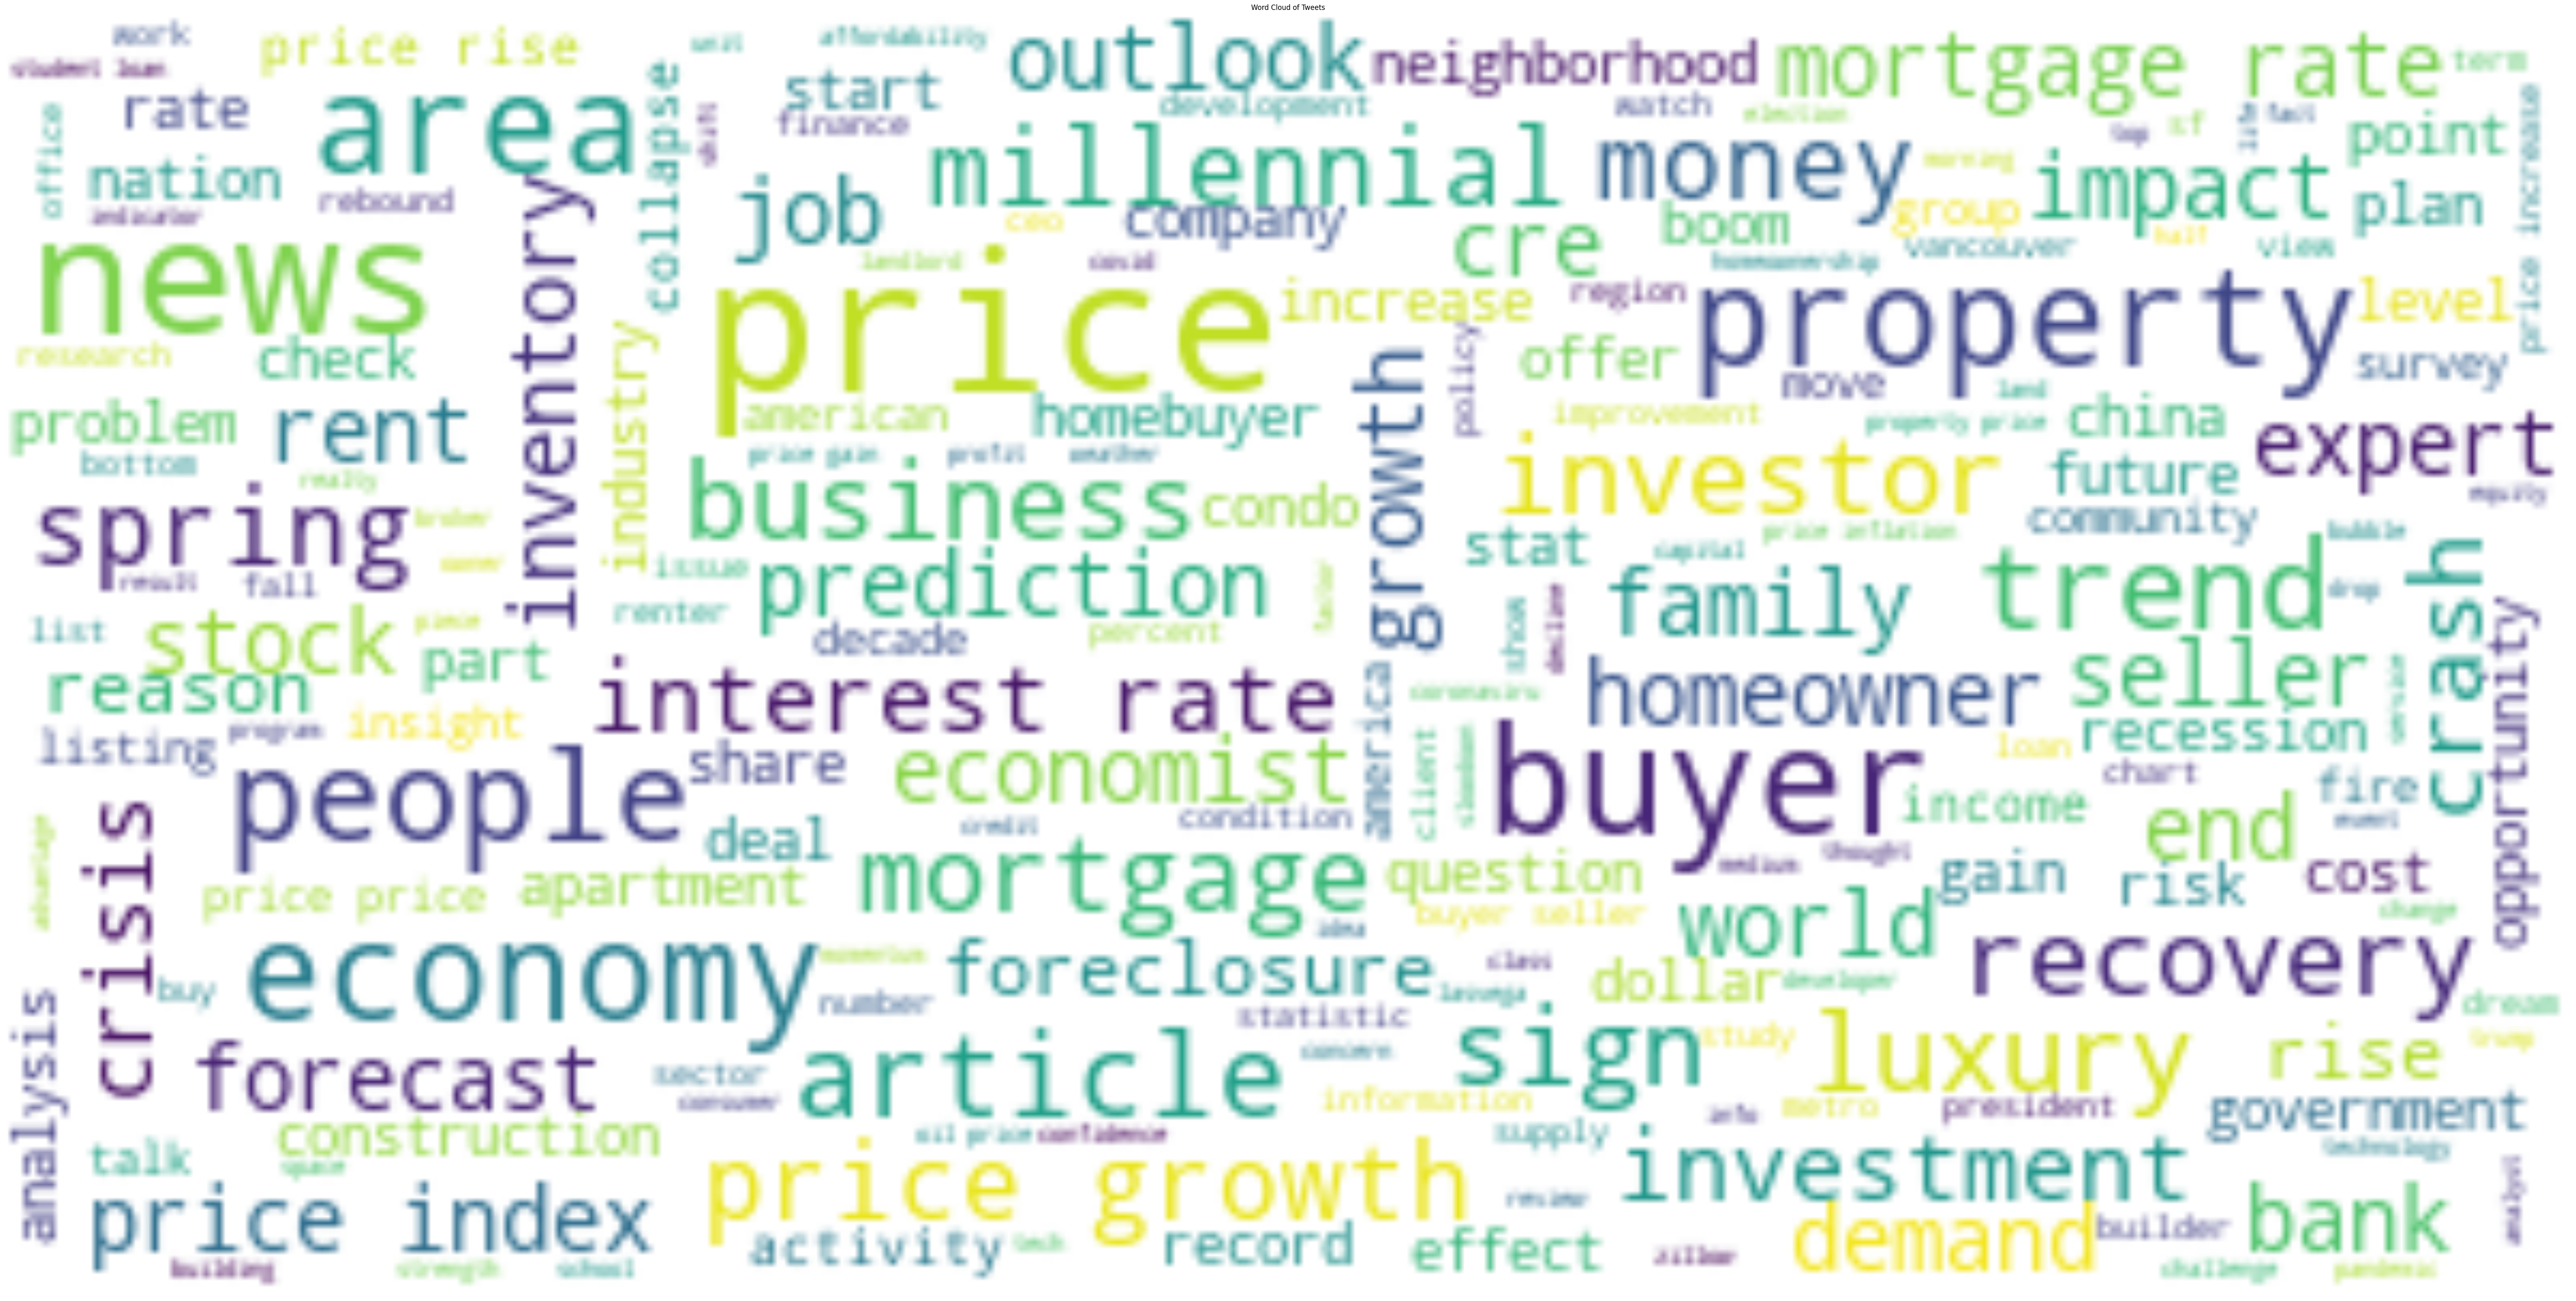

In [81]:
#Generate the word cloud
from wordcloud import WordCloud
# Flatten the list of tokens into a single list
all_tokens = filtered_df['text'].sum()

# Join the list of tokens into a single string
all_text = ' '.join(all_tokens)

# Generate a wordcloud from the string
wordcloud = WordCloud(max_font_size=30, background_color='white').generate(all_text)
#, contour_color = 'black', contour_width = 2, color_func = lambda *args, **kwargs: 'black'
# Set the width and height of the figure
plt.figure(figsize=(80, 50))

# Display the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')

# Turn off the axis labels
plt.axis("off")

# Set the title of the plot
plt.title("Word Cloud of Tweets")

# Display the plot
plt.show()


In [82]:
# Run LDA model
import numpy as np
import json
import glob

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim_models


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
id2word = corpora.Dictionary(filtered_df.text)

corpus = []
for wordi in filtered_df.text:
    new = id2word.doc2bow(wordi)
    corpus.append(new)
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=13,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=50,
                                           passes=10,
                                           alpha="auto")

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=20)
vis


c:\Users\myloe\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
c:\Users\myloe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.413101 -0.256801       1        1  39.926542
6     -0.055529 -0.449117       2        1   8.875107
7     -0.437017 -0.140970       3        1   8.006478
9     -0.285381  0.357313       4        1   7.347119
10     0.183085 -0.376605       5        1   7.223322
0      0.439538  0.028212       6        1   5.893601
1     -0.010992  0.442925       7        1   4.882776
12    -0.247270 -0.301966       8        1   4.526813
4     -0.392650  0.119204       9        1   4.299017
8      0.243877  0.356153      10        1   3.405913
3      0.246854  0.130071      11        1   2.498803
2     -0.025501  0.139446      12        1   1.863345
11    -0.072116 -0.047866      13        1   1.251164, topic_info=                        Term          Freq         Total Category  logprob  \
33                     price  15781.000000  15781.000000  Default  20.0000   
126                   people   4574.000000   4574.000000  Default  19.0000   
24                     buyer   5113.000000   5113.000000  Default  18.0000   
18                  property   4319.000000   4319.000000  Default  17.0000   
150                     rate   4299.000000   4299.000000  Default  16.0000   
...                      ...           ...           ...      ...      ...   
6022                   homes      0.055731      0.816055  Topic13 -11.3240   
7709             risingprice      0.053758      0.801976  Topic13 -11.3600   
8961            lowinventory      0.053758      0.801976  Topic13 -11.3600   
12684              homeloans      0.053558      0.801268  Topic13 -11.3637   
12731  residentialrealestate      0.053774      0.806728  Topic13 -11.3597   

       loglift  
33     20.0000  
126    19.0000  
24     18.0000  
18     17.0000  
150    16.0000  
...        ...  
6022    1.6972  
7709    1.6785  
8961    1.6785  
12684   1.6757  
12731   1.6729  

[282 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
166      11  0.998521     access
303       7  0.998287   activity
376      11  0.997115  advantage
502       5  0.996028     advice
3001     12  0.993689  afternoon
...     ...       ...        ...
862       7  0.996610      woman
266       4  0.999693       work
19        4  0.999452      world
453       9  0.999471     zillow
799       3  0.996448        zip

[258 rows x 3 columns], R=20, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 7, 8, 10, 11, 1, 2, 13, 5, 9, 4, 3, 12])

In [83]:
#Export the topics and words with corresponding weights to csv file
import csv

topics = lda_model.print_topics(num_words=20)
perplexity = lda_model.log_perplexity(corpus)


with open('topics13.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Topic', 'Words', 'Weight','Perplexity','Coherence'])
    for topic in topics:
        topic_num = topic[0]+1
        topic_words = topic[1].split('+')
        for word in topic_words:
            word_data = word.split('*')
            word_weight = word_data[0]
            word_name = word_data[1]
            writer.writerow([topic_num, word_name, word_weight, perplexity])
            

In [84]:
#Sentiment-Topic Scores
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
monthly_sentiments_by_city_topic = {}
for i in range(5):
    filtered_df[f'sentiment_topic_{i}'] = 0
for i, row in filtered_df.iterrows():
    text = row['text']
    sentiment = analyzer.polarity_scores(text)['compound']
    date = row['created_at'].to_period("M")
    city = row['city']
    for j in range(5):
        if row[f'topic_{j}'] > 0:
            filtered_df.at[i, f'sentiment_topic_{j}'] = sentiment
            weight = row[f'topic_{j}']
            if (date, city, j) in monthly_sentiments_by_city_topic:
                monthly_sentiments_by_city_topic[(date, city, j)]['weighted_sentiment_sum'] += sentiment * row[f'topic_{j}']
                monthly_sentiments_by_city_topic[(date, city, j)]['count'] += 1
            else:
                monthly_sentiments_by_city_topic[(date, city, j)] = {'weighted_sentiment_sum': sentiment * row[f'topic_{j}'], 'count': 1}

for key, value in monthly_sentiments_by_city_topic.items():
    monthly_sentiments_by_city_topic[key] = value['weighted_sentiment_sum']/value['count']





#General Sentiment Scores
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
monthly_sentiments_by_city1 = {}
for i, row in filtered_df.iterrows():
    text = row['text']
    sentiment = analyzer.polarity_scores(text)['compound']
    date = row['created_at'].to_period("M")
    city = row['city']
    if (date, city) in monthly_sentiments_by_city1:
        monthly_sentiments_by_city1[(date, city)]['weighted_sentiment_sum'] += sentiment
        monthly_sentiments_by_city1[(date, city)]['count'] += 1
    else:
        monthly_sentiments_by_city1[(date, city)] = {'weighted_sentiment_sum': sentiment, 'count': 1}
for key, value in monthly_sentiments_by_city1.items():
    monthly_sentiments_by_city1[key] = value['weighted_sentiment_sum']/value['count']

C:\Users\myloe\AppData\Local\Temp\ipykernel_20616\3072728539.py:10: UserWarning: Converting to Period representation will drop timezone information.
  date = row['created_at'].to_period("M")


KeyError: 'city'